A)


Text(0.5, 1.0, 'original photo')

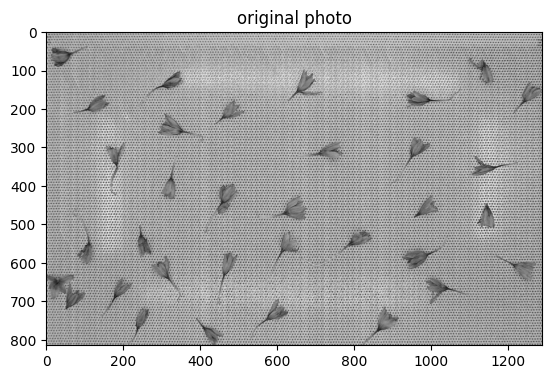

In [ ]:
# load image and convert it to gray scale
import matplotlib.pyplot as plt
import cv2
my_image = cv2.imread('saffrun.jpg')
gray_image = cv2.cvtColor(my_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image , cmap='gray')
plt.title('original photo')

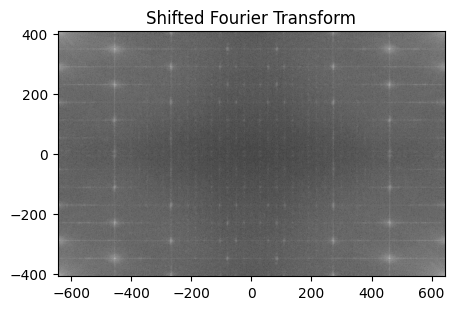

In [ ]:
#find the fourier transform of noisy image
import numpy as np

M,N = gray_image.shape

fourier = np.fft.fft2(gray_image)

f, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.log(1 + np.abs(fourier)), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Shifted Fourier Transform')
plt.show()


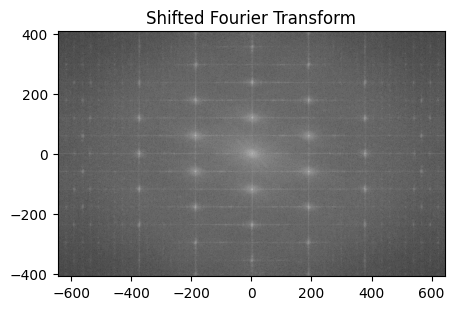

In [ ]:
#shift the forier to center 
shifted_fourier =  np.fft.fftshift(fourier)

f, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.log(1 + np.abs(shifted_fourier)), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Shifted Fourier Transform')
plt.show()



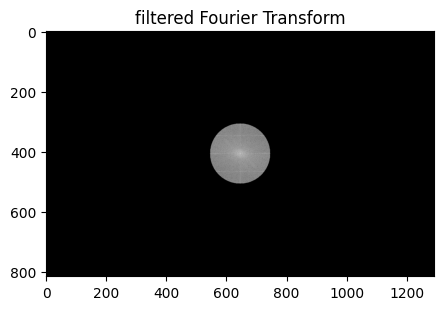

In [ ]:
#denoise the fourier transform by making the out of circle 0
center = [int(M / 2), int(N / 2)]
x, y = np.ogrid[:M, :N]
#define a mask with zeros out of circle and 1 inside the circle
mask = np.zeros(gray_image.shape)
mask_area = ((x - center[0]) **  2 + (y - center[1]) **  2 <= 100*100) 
mask[mask_area] = 1
shifted_fourier = shifted_fourier * mask

f, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.log(1 + np.abs(shifted_fourier)), cmap='gray')
ax.set_title('filtered Fourier Transform')
plt.show()


Text(0.5, 1.0, 'denoised photo')

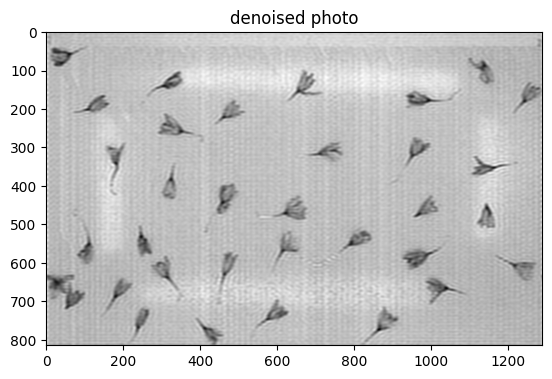

In [12]:
#shift the Fourier transform back to the original position
denoised_shifted_fourier = np.fft.ifftshift(shifted_fourier)

#perform inverse Fourier transform to obtain the denoised image
denoised_image = np.real(np.fft.ifft2(denoised_shifted_fourier))

plt.imshow(denoised_image , cmap='gray')
plt.title('denoised photo')

B)


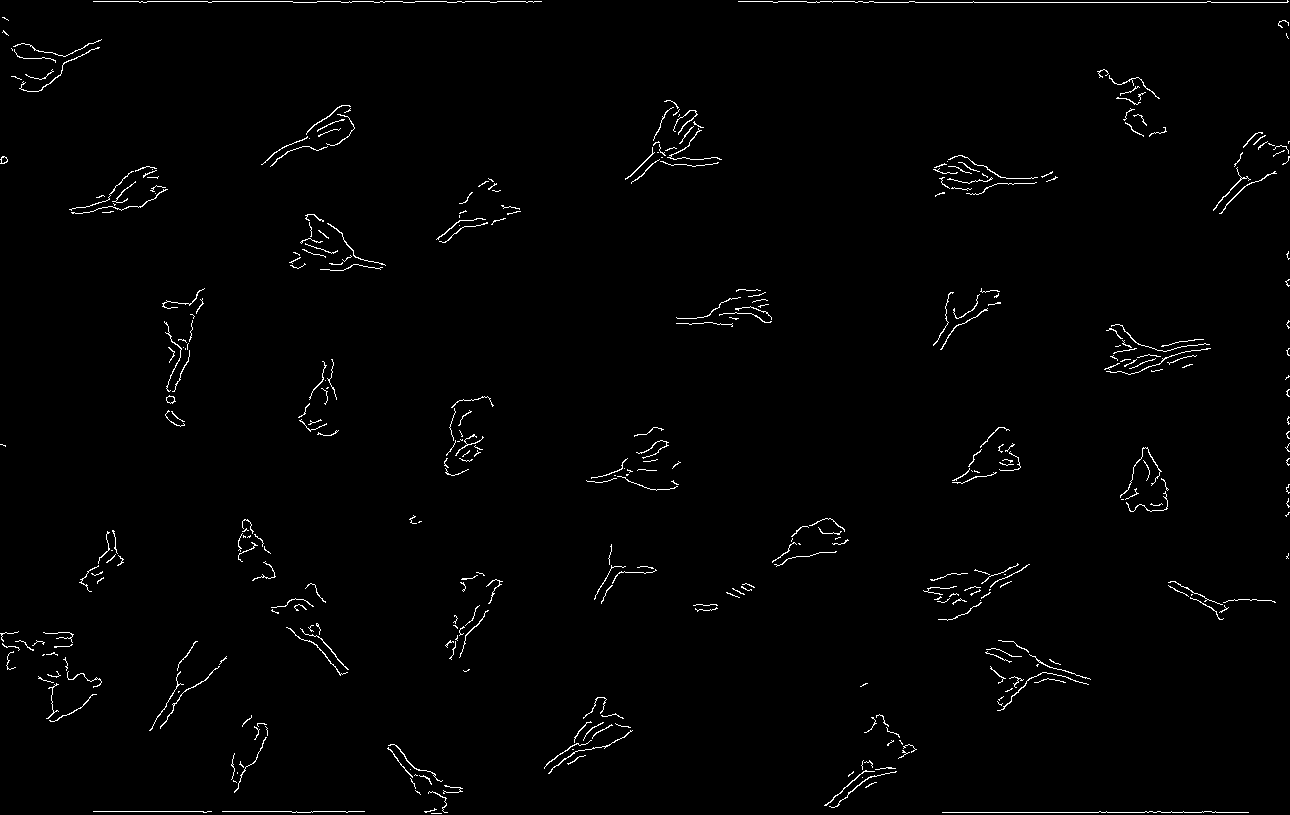

In [13]:
from google.colab.patches import cv2_imshow
#make the pixels 0 and 1 
edges = cv2.Canny(np.uint8(denoised_image), 50, 90)  # Parameters: (input image, threshold1, threshold2)
cv2_imshow(edges)

C)


In [ ]:
# write convolution function
def convolve(matrix, kernel):
  res = np.zeros((len(matrix) - len(kernel) + 1 , len(matrix) - len(kernel) + 1))

  for t in range(len(matrix) - len(kernel) - 1):
    for p in range(len(matrix) - len(kernel) - 1):
      hold = matrix[t : t + len(kernel) , p : p + len(kernel)]
      res[t , p] = np.sum(np.multiply(hold , kernel))
  return res
  

In [14]:
horizontal = [[-1, 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]]
vertical = [[-1, -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]]

p1_horizontal = convolve(edges , horizontal)
p1_vertical = convolve(edges , vertical)

mag = np.sqrt(p1_horizontal**2 + p1_vertical **2)
grad = np.arctan2(p1_vertical , p1_horizontal) / np.pi * 180